## Data Exploration

In [2]:
import pandas as pd
import datetime as dt

In [4]:
offers = pd.read_csv(r"C:\Users\wangj\Desktop\project\Insights from failed orders\data_offers.csv")
orders = pd.read_csv(r"C:\Users\wangj\Desktop\project\Insights from failed orders\data_orders.csv")

In [11]:
offers.head(5)

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [12]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [13]:
orders.head(5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [15]:
orders['order_datetime']=pd.to_datetime(orders['order_datetime'], format = "%H:%M:%S")
orders = orders.drop_duplicates()
offers = offers.drop_duplicates()
offers[offers['order_gk']==3000632496952]

,order_gk,offer_id
15228,3000632496952,300052386824
19820,3000632496952,300052386821
154473,3000632496952,300052386826
183397,3000632496952,300052386825


In [16]:
orders_offers = pd.merge(orders, offers, on = 'order_gk', how = 'inner')
orders_offers

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275
...,...,...,...,...,...,...,...,...,...
31263,1900-01-01 12:44:11,-0.975372,51.457846,NaN,3000597886155,4,0,43.0,300051590196
31264,1900-01-01 12:42:52,-0.975372,51.457846,NaN,3000597886140,4,0,44.0,300051590176
31265,1900-01-01 13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,300051648809
31266,1900-01-01 13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,300051648910


## Insights about failed orders

### Question 1: If we divided those failed orders into certain categories, which categories have the highest number of failed orders?

In [17]:
import numpy as np
orders_offers['is_driver_assigned'] = np.where(orders_offers['is_driver_assigned_key']==1, 'Yes', 'No')
orders_offers['order_status'] = np.where(orders_offers['order_status_key']==4, 'cancelled by client','cancelled by system')
orders_offers = orders_offers.drop(columns = ['order_status_key','is_driver_assigned_key'])
orders_offers

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,cancelled by client
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,cancelled by client
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,cancelled by client
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,cancelled by client
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,cancelled by client
...,...,...,...,...,...,...,...,...,...
31263,1900-01-01 12:44:11,-0.975372,51.457846,NaN,3000597886155,43.0,300051590196,No,cancelled by client
31264,1900-01-01 12:42:52,-0.975372,51.457846,NaN,3000597886140,44.0,300051590176,No,cancelled by client
31265,1900-01-01 13:11:35,-0.975372,51.457846,NaN,3000599186906,36.0,300051648809,No,cancelled by client
31266,1900-01-01 13:17:21,-0.972926,51.457693,60.0,3000599187034,34.0,300051648910,Yes,cancelled by client


In [18]:
failure_categories = orders_offers.groupby(['is_driver_assigned','order_status'])['order_gk'].nunique().rename('num_orders')
failure_categories

is_driver_assigned  order_status       
No                  cancelled by client    3367
                    cancelled by system    1903
Yes                 cancelled by client    2338
                    cancelled by system       2
Name: num_orders, dtype: int64

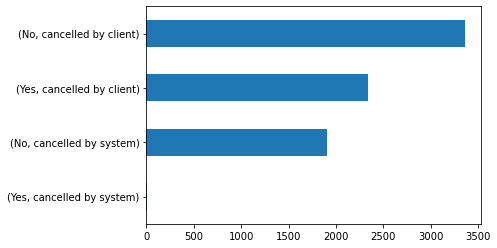

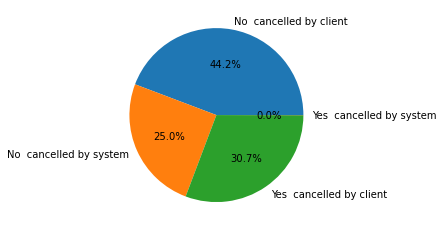

In [65]:
import matplotlib.pyplot as plt
failure_categories.sort_values(ascending = True).plot.barh(rot = 360).set_ylabel('')
plt.show()
labels = ["No  cancelled by client", "No  cancelled by system", "Yes  cancelled by client", "Yes  cancelled by system" ]
plt.pie(failure_categories, labels = labels, autopct='%1.1f%%')
plt.show()

From this graph, we know that the category with no driver is assigned and cancelled by client has the highest number of failed orders. Most failed orders were cancelled by clients. It would be better if we can know the reason behind the 25% cancelled by the system with no driver assigned.

### Question 2: Which hours have relatively high failed orders? What might be the reason behind this?

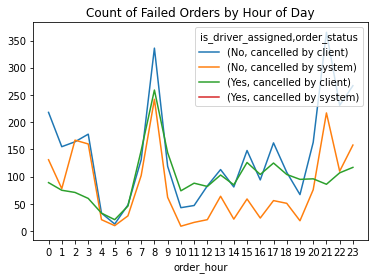

In [20]:
orders_offers['order_hour'] = orders_offers['order_datetime'].dt.hour
failure_by_hour = orders_offers.groupby(['order_hour','is_driver_assigned','order_status'])['order_gk'].nunique().reset_index().pivot(index = 'order_hour',columns = ['is_driver_assigned','order_status'], values = 'order_gk').plot(legend=True, xticks=range(0, 24),title="Count of Failed Orders by Hour of Day")

As we can see, different categories roughly follow the same trend. For orders that have no driver assigned and cancelled by clients and systems, they reached the peak in the morning at 8 and 21 in the evening.It might be because people going to work and getting off work. In the morning, people would cancel no matter if they have drivers assigned. However, people are less likely to cancel at night when they have drivers assigned. It might be because it's too late for them and it's more convenient to just take the car. 

### Question 3 : Is there any relationship between average eta time and failed orders?

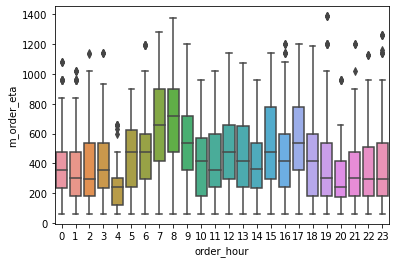

In [68]:
import seaborn as sns
order_eta = orders_offers['m_order_eta']
sns.boxplot(x = orders_offers['order_hour'], y = order_eta)
plt.show()

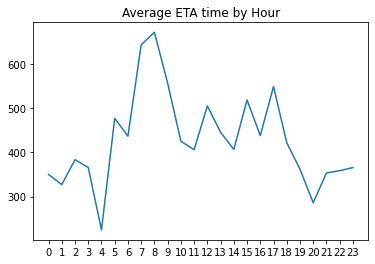

In [22]:
l_eta = []
for hour in range(24):
    eta = orders_offers[orders_offers['order_hour'] == hour]['m_order_eta']
    Q1 = eta.quantile(0.25)
    Q3 = eta.quantile(0.75)
    IQR = Q3-Q1
    filtered_eta = eta[(eta >= Q1-1.5*IQR)&(eta <= Q3+1.5*IQR)]
    avg_eta = filtered_eta.mean()
    l_eta.append(avg_eta)
sns.lineplot( x = list(range(24)), y = np.array(l_eta))
plt.xticks(range(24))
plt.title("Average ETA time by Hour")
plt.show()

The line very closely matches the count of failed orders per hour, indicating that the number of failed orders increases as the average waiting time of the client increases.

### Question 4: Does driver assignment affect cancellation time? What's the trend for cancellation time across the day?

Text(0.5, 1.0, 'Cancellation time with driver assigned by hour')

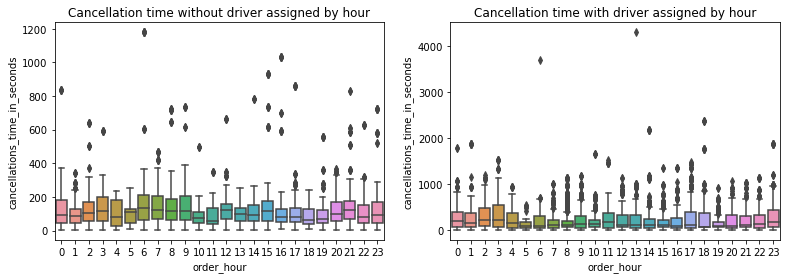

In [36]:
cancel_time_0 = orders_offers[orders_offers['is_driver_assigned'] == 'No']["cancellations_time_in_seconds"]
cancel_time_1 = orders_offers[orders_offers['is_driver_assigned'] == 'Yes']["cancellations_time_in_seconds"]
fig, axes = plt.subplots(1,2, figsize = (13,4))
sns.boxplot(ax = axes[0],x = orders_offers['order_hour'], y = cancel_time_0)
axes[0].set_title("Cancellation time without driver assigned by hour")
sns.boxplot(ax = axes[1],x = orders_offers['order_hour'], y = cancel_time_1)
axes[1].set_title("Cancellation time with driver assigned by hour")

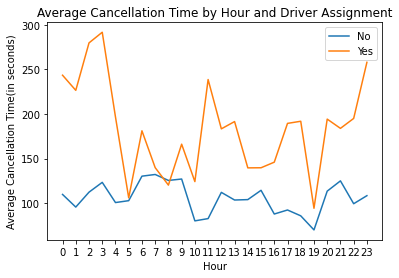

In [37]:
l_cancel_no = []
for hour in range(24):
    cancel_no = orders_offers[(orders_offers['order_hour'] == hour)&(orders_offers['is_driver_assigned']=='No')]['cancellations_time_in_seconds']
    Q1 = cancel_no.quantile(0.25)
    Q3 = cancel_no.quantile(0.75)
    IQR = Q3-Q1
    filtered_cancel_no = cancel_no[(cancel_no >= Q1-1.5*IQR)&(cancel_no <= Q3+1.5*IQR)]
    avg_cancel_no = filtered_cancel_no.mean()
    l_cancel_no.append(avg_cancel_no)
sns.lineplot( x = list(range(24)), y = np.array(l_cancel_no), legend = "full", label = 'No')
plt.xticks(range(24))
l_cancel_yes = []
for hour in range(24):
    cancel_yes = orders_offers[(orders_offers['order_hour'] == hour)&(orders_offers['is_driver_assigned']=='Yes')]['cancellations_time_in_seconds']
    Q1 = cancel_yes.quantile(0.25)
    Q3 = cancel_yes.quantile(0.75)
    IQR = Q3-Q1
    filtered_cancel_yes = cancel_yes[(cancel_yes >= Q1-1.5*IQR)&(cancel_yes <= Q3+1.5*IQR)]
    avg_cancel_yes = filtered_cancel_yes.mean()
    l_cancel_yes.append(avg_cancel_yes)
sns.lineplot( x = list(range(24)), y = np.array(l_cancel_yes), legend = 'full', label = 'Yes').set( xlabel = "Hour", ylabel = "Average Cancellation Time(in seconds)")
plt.title("Average Cancellation Time by Hour and Driver Assignment")
plt.show()

The average cancellation time is longer when drivers are assigned for each hour in most cases. The cancellation time with driver assigned is relatively high from 23 at night to 3 in the morning, meaning that customers are more likely to wait as long as they have driver assigned. The cancellation time without driver assigned would be cancelled within short period of time across the day. 

### Here we want to compare eta time and cancellation time to see if there's any pattern. 

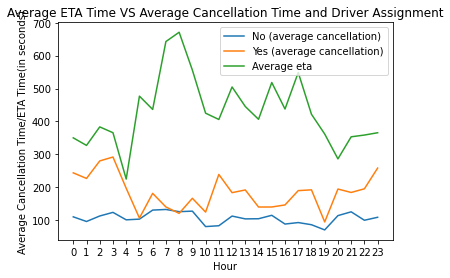

In [35]:
sns.lineplot( x = list(range(24)), y = np.array(l_cancel_no), legend = "full", label = 'No (average cancellation)')
plt.xticks(range(24))
sns.lineplot( x = list(range(24)), y = np.array(l_cancel_yes), legend = 'full', label = 'Yes (average cancellation)').set( xlabel = "Hour", ylabel = "Average Cancellation Time/ETA Time(in seconds)")
sns.lineplot( x = list(range(24)), y = np.array(l_eta), legend = 'full', label = 'Average eta')
plt.title("Average ETA Time VS Average Cancellation Time and Driver Assignment")
plt.show()

From the previous graph, we know people having driver assigned would have longer cancellation time. However, this is not the case at certain time. From 5 to 8 in the morning , the average cancellation time with or without driver assigned are around the same. Take a look at average eta, we can see that average eta time at these time points are relatively high. It is logically to assume that whether people have drivers assigned or not, they might cancel within the short time due to the long waiting time. This only happens in the morning. It might be because people were taking rides to the companies and they don't have much time to wait. However, this assumption needs more information to validate. 